####Music 21 is a Python library developed by MIT for understanding music data. MIDI is a standard format for storing music files. MIDI stands for Musical Instrument Digital Interface. MIDI files contain the instructions rather than the actual audio. Hence, it occupies very little memory. That’s why it is usually preferred while transferring files

In [ ]:
from music21 import *

In [ ]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
import os
import numpy as np
path = '/content/drive/MyDrive/music gen/'

# read all file names
files = [i for i in os.listdir(path) if i.endswith('.mid')]

# reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: /content/drive/MyDrive/music gen/schubert_D850_1.mid
Loading Music File: /content/drive/MyDrive/music gen/schubert_D850_2.mid
Loading Music File: /content/drive/MyDrive/music gen/schubert_D850_3.mid
Loading Music File: /content/drive/MyDrive/music gen/schubert_D850_4.mid
Loading Music File: /content/drive/MyDrive/music gen/schub_d760_1.mid
Loading Music File: /content/drive/MyDrive/music gen/schub_d760_2.mid
Loading Music File: /content/drive/MyDrive/music gen/schub_d760_3.mid
Loading Music File: /content/drive/MyDrive/music gen/schub_d760_4.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-1.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-2.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-3.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-4.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-5.mid
Loading Music File: /content/drive/MyDrive/music gen/schumm-6.mid
Loading Music File: /content/dri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


###Understanding the data:

Under this section, we will explore the dataset and understand it in detail.

In [ ]:
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

304


(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

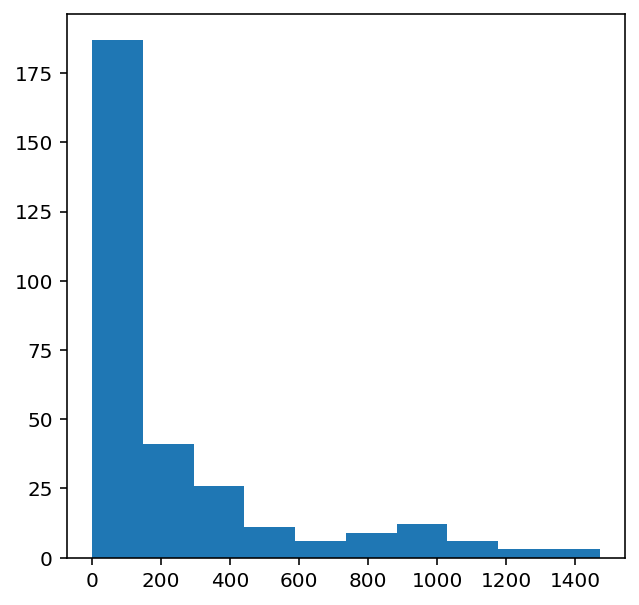

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

# library for visulaization
import matplotlib.pyplot as plt

# consider only the frequencies
no = [count for _, count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

###From the above plot, we can infer that most of the notes have a very low frequency. So, let us keep the top frequent notes and ignore the low-frequency ones. Here, I am defining the threshold as 50. Nevertheless, the parameter can be changed.

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count >= 50]
print(len(frequent_notes))

167


####As you can see here, no. of frequently occurring notes is around 170.  Now, let us prepare new musical files which contain only the top frequent notes

In [ ]:
new_music = []

for notes in notes_array :
  temp = []
  for note_ in notes :
    if note_ in frequent_notes :
      temp.append(note_)

  new_music.append(temp)

new_music = np.array(new_music)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


### Preparing the data

In [ ]:
no_of_timesteps =32
x = []
y = []

for note_ in new_music :
  for i in range(0, len(note_) - no_of_timesteps, 1):

    # preparing input and output sequences
    input_ = note_[i : i + no_of_timesteps]
    output_ = note_[i + no_of_timesteps]

    x.append(input_)
    y.append(output_)

x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(64413, 32)

###Now, we will assign a unique integer to every note:

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

### We will prepare the integer sequences for input data

In [ ]:
#preparing input sequences
x_seq = []
for i in x :
  temp = []
  for j in i :
    #assigning unique integer to every note
    temp.append(x_note_to_int[j])

  x_seq.append(temp)

x_seq = np.array(x_seq)

In [ ]:
x_seq[0]

array([ 24, 136,  71, 133,  71, 133,  71, 133,  71, 133, 160, 166, 114,
        27,  44, 130, 154,  24, 154,  24, 154,  24, 154,  24,  92, 166,
        27, 149, 156, 156,  51, 137])

### Similarly, prepare the integer sequences for output data as well

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

### Let us preserve 80% of the data for training and the rest 20% for the evaluation:

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

### **MODEL BUILDING**

In [ ]:
def lstm():
  model = Sequential()
  model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True))
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(len(unique_y)))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
model = lstm()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc=ModelCheckpoint('/content/drive/MyDrive/music gen/best_model_lstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr), np.array(y_tr), batch_size=128, epochs=50, validation_data=(np.array(x_val),np.array(y_val)), verbose=1, callbacks=[mc])

Epoch 1/50
403/403 [==============================] - 7s 12ms/step - loss: 4.5394 - val_loss: 3.8306

Epoch 00001: val_loss improved from inf to 3.83060, saving model to /content/drive/MyDrive/music gen/best_model_lstm.h5
Epoch 2/50
403/403 [==============================] - 4s 10ms/step - loss: 3.7405 - val_loss: 3.6105

Epoch 00002: val_loss improved from 3.83060 to 3.61052, saving model to /content/drive/MyDrive/music gen/best_model_lstm.h5
Epoch 3/50
403/403 [==============================] - 4s 10ms/step - loss: 3.5058 - val_loss: 3.4413

Epoch 00003: val_loss improved from 3.61052 to 3.44134, saving model to /content/drive/MyDrive/music gen/best_model_lstm.h5
Epoch 4/50
403/403 [==============================] - 4s 10ms/step - loss: 3.3385 - val_loss: 3.3252

Epoch 00004: val_loss improved from 3.44134 to 3.32525, saving model to /content/drive/MyDrive/music gen/best_model_lstm.h5
Epoch 5/50
403/403 [==============================] - 4s 10ms/step - loss: 3.1620 - val_loss: 3.2078

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           16700     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc=ModelCheckpoint('/content/drive/MyDrive/music gen/best_model_wavenet.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr), np.array(y_tr), batch_size=128, epochs=50, validation_data=(np.array(x_val),np.array(y_val)), verbose=1, callbacks=[mc])

Epoch 1/50
403/403 [==============================] - 4s 9ms/step - loss: 4.6114 - val_loss: 4.0171

Epoch 00001: val_loss improved from inf to 4.01709, saving model to /content/drive/MyDrive/music gen/best_model_wavenet.h5
Epoch 2/50
403/403 [==============================] - 3s 8ms/step - loss: 3.8346 - val_loss: 3.8119

Epoch 00002: val_loss improved from 4.01709 to 3.81190, saving model to /content/drive/MyDrive/music gen/best_model_wavenet.h5
Epoch 3/50
403/403 [==============================] - 3s 8ms/step - loss: 3.6266 - val_loss: 3.6760

Epoch 00003: val_loss improved from 3.81190 to 3.67605, saving model to /content/drive/MyDrive/music gen/best_model_wavenet.h5
Epoch 4/50
403/403 [==============================] - 3s 8ms/step - loss: 3.4809 - val_loss: 3.5638

Epoch 00004: val_loss improved from 3.67605 to 3.56380, saving model to /content/drive/MyDrive/music gen/best_model_wavenet.h5
Epoch 5/50
403/403 [==============================] - 3s 8ms/step - loss: 3.3739 - val_loss:

In [ ]:
# loading best model
model = load_model('/content/drive/MyDrive/music gen/best_model_lstm.h5')

### Its time to compose our own music now.

In [ ]:
import random
ind = np.random.randint(0, len(x_val)-1) # will output any random index in x_val

random_music = x_val[ind]

predictions = []

for i in range(20):

  random_music = random_music.reshape(1, no_of_timesteps)

  prob = model.predict(random_music)[0]
  y_pred = np.argmax(prob, axis = 0)
  predictions.append(y_pred)

  random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
  random_music = random_music[1:]

print(predictions)


[2, 126, 126, 51, 126, 51, 126, 126, 51, 3, 126, 126, 133, 48, 4, 126, 126, 133, 126, 98]


### Now, we will convert the integers back into the notes

In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='/content/drive/MyDrive/music gen/generated_music.mid')

In [ ]:
convert_to_midi(predicted_notes)